In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
col = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']

df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\unlabeled.csv", names = col)

In [3]:
df.head(3)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,24667,529,512,262,432,92,3,1,1,0
1,24668,150,0,0,150,0,0,0,0,0
2,24669,227,236,57,204,21,1,1,0,0


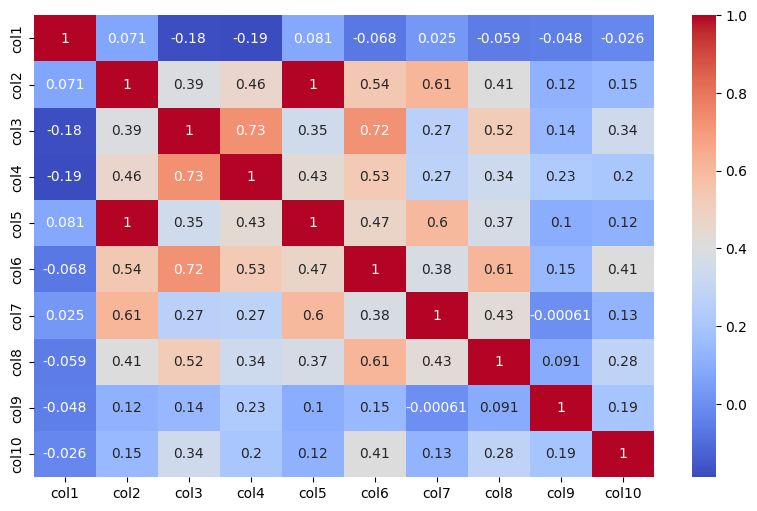

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = df.drop(columns=['col1', 'col10', 'col9'])
for col in x.select_dtypes(include=['int64', 'float64']).columns:
    mms.fit(x[[col]])
    x[col] = mms.transform(x[[col]])

In [6]:
import scipy.cluster.hierarchy as sc
from sklearn.cluster import AgglomerativeClustering

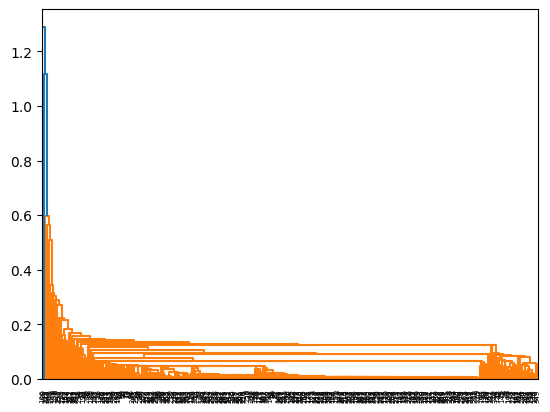

In [7]:
sc.dendrogram(sc.linkage(x, method='single'))
plt.show()

In [8]:
ac = AgglomerativeClustering(n_clusters=2, linkage='single')
x['output'] = ac.fit_predict(df)

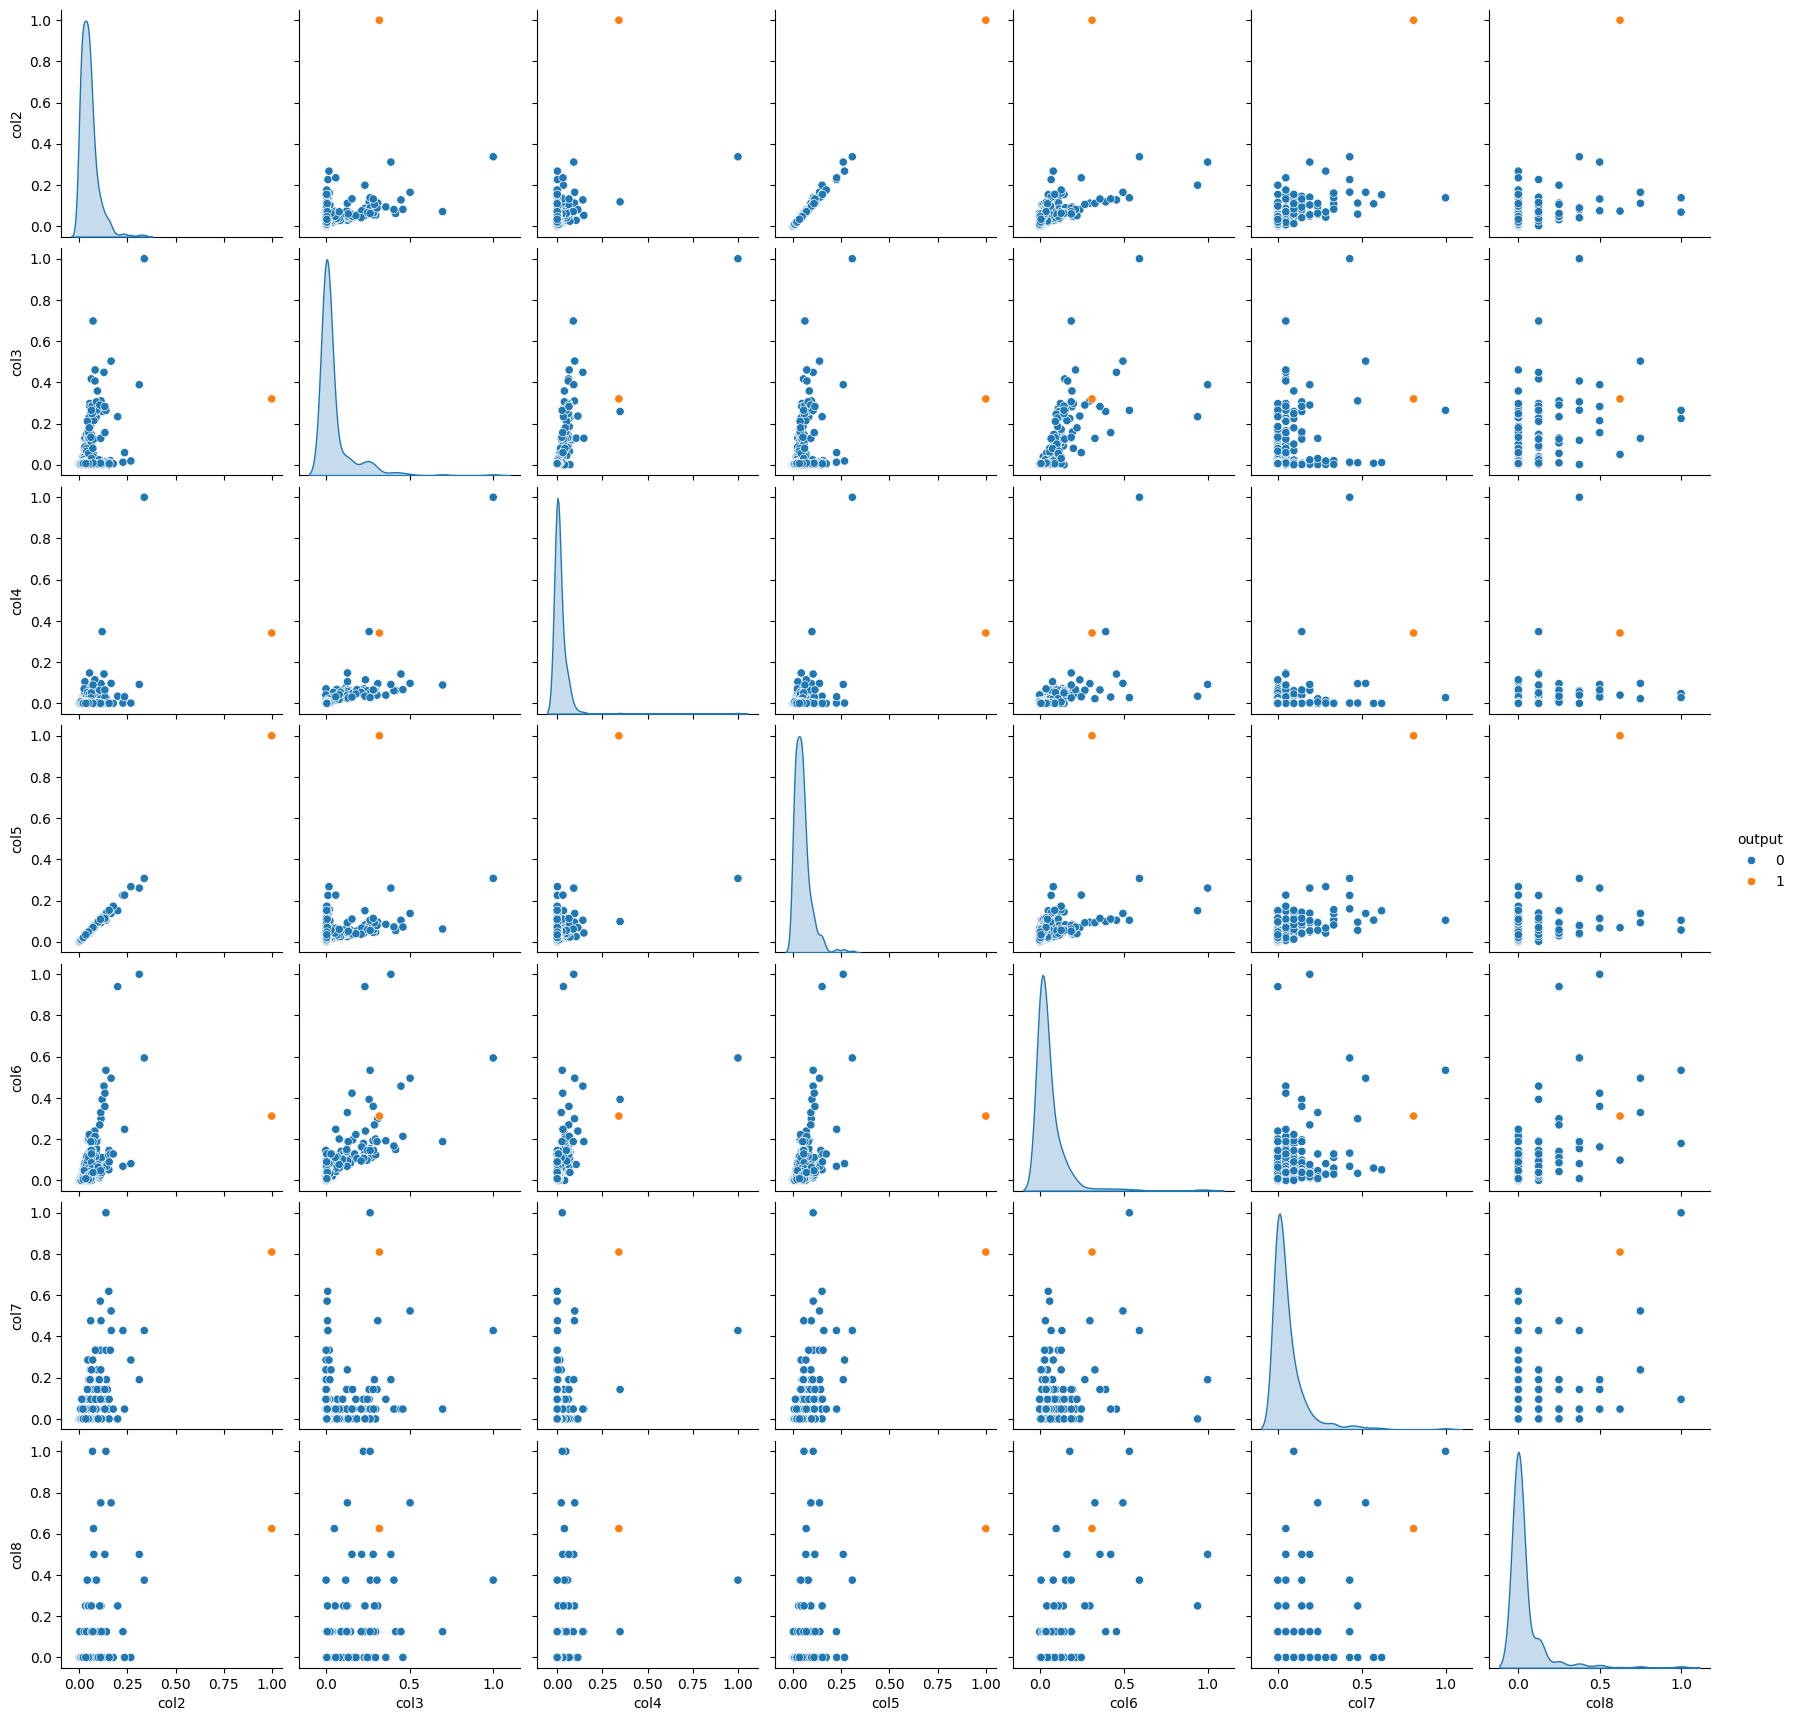

In [9]:
sns.pairplot(data=x, hue='output')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

print(silhouette_score(x,labels=ac.labels_)*100)

88.0369225810775


In [11]:
scores = []

for i in range(2, 11):
    a = AgglomerativeClustering(n_clusters=i, linkage='single')
    a.fit(x)
    scores.append(silhouette_score(x,labels = a.labels_)*100)


In [12]:
scores

[np.float64(88.0369225810775),
 np.float64(85.25600500277693),
 np.float64(83.63921124246083),
 np.float64(79.20993527890326),
 np.float64(78.69142205510552),
 np.float64(76.73172807237401),
 np.float64(76.50659457603619),
 np.float64(73.16090015514749),
 np.float64(63.27793355181309)]